In [21]:
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import cartopy
import cartopy.crs as ccrs

In [27]:
def sh_visualize(folder="shinr",dtype="all", title="",L=5,M=3,draw_target=False):
    # L = 5    # degree
    # M = 3    # order

    lat, lon = np.linspace(-0.5*np.pi,0.5*np.pi,180), np.linspace(0,2*np.pi,360)

    if dtype == "all":
        start, step = 0, 1
    elif dtype == "train":
        start, step = 0, 2
    else:
        start, step = 1, 2

    lat_idx = np.arange(start, len(lat), step)
    lon_idx = np.arange(start, len(lon), step)

    lat = lat[lat_idx]  # 171
    lon = lon[lon_idx]  # 342

    PHI, THETA = np.meshgrid(lon,lat)
    target = np.load(folder + "/target.npy") - 0.5
    # R = sp.sph_harm(M, L, PHI, THETA).real
    X = target * np.sin(THETA) * np.cos(PHI)
    Y = target * np.sin(THETA) * np.sin(PHI)
    Z = target * np.cos(THETA)

    #As R has negative values, we'll use an instance of Normalize
    #see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
    norm = colors.Normalize()
    fontsize= 10
    if draw_target:
        fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(7,5))
        m = cm.ScalarMappable(cmap=cm.jet)
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(target)))
        ax.set_title(f'target real$(Y^{L}_{M})$ {title}', fontsize=fontsize)
        m.set_array(target)
        # fig.colorbar(m, shrink=0.8)
        plt.show()

    pred = np.load(folder + '/pred.npy')-0.5
    X = pred * np.sin(THETA) * np.cos(PHI)
    Y = pred * np.sin(THETA) * np.sin(PHI)
    Z = pred * np.cos(THETA)
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(7,5))
    ax.set_title(f'pred real$(Y^{L}_{M})$ {title}', fontsize=fontsize)
    m = cm.ScalarMappable(cmap=cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(pred)))
    m.set_array(pred)
    plt.show()

    error = target-pred
    # error = error**2
    X = error * np.sin(THETA) * np.cos(PHI)
    Y = error * np.sin(THETA) * np.sin(PHI)
    Z = error * np.cos(THETA)

    fig, ax1 = plt.subplots(figsize=(7,5),subplot_kw=dict(projection='3d'))
    m = cm.ScalarMappable(cmap=cm.jet)
    ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(error)))
    ax1.set_title(f'error  $(Y^{L}_ {M})$ {title}', fontsize=fontsize)
    m.set_array(error)
    plt.show()
    
    viewpoint = 60
    plotcrs = ccrs.Orthographic(0, 90-viewpoint)
    
    if draw_target:
        fig, ax1 = plt.subplots(figsize=(7,5),subplot_kw=dict(projection=plotcrs))
        # fig, ax1 = plt.subplots(figsize=(7,5))
        vlim = np.max(np.abs(pred))
        ax1.pcolormesh(PHI*180/np.pi,THETA*180/np.pi,error,transform=ccrs.PlateCarree(),
                            cmap='seismic',vmin=-vlim,vmax=vlim)
        ax1.relim()
        ax1.autoscale_view()
        plt.show()
    
    fig, ax1 = plt.subplots(figsize=(7,5),subplot_kw=dict(projection=plotcrs))
    # fig, ax1 = plt.subplots(figsize=(7,5))
    vlim = np.max(np.abs(pred))
    ax1.pcolormesh(PHI*180/np.pi,THETA*180/np.pi,error,transform=ccrs.PlateCarree(),
                        cmap='seismic',vmin=-vlim,vmax=vlim)
    ax1.relim()
    ax1.autoscale_view()
    plt.show()
    
    fig, ax1 = plt.subplots(figsize=(7,5),subplot_kw=dict(projection=plotcrs))
    # fig, ax1 = plt.subplots(figsize=(7,5))
    vlim = np.max(np.abs(error))
    ax1.pcolormesh(PHI*180/np.pi,THETA*180/np.pi,error,transform=ccrs.PlateCarree(),
                        cmap='seismic',vmin=-vlim,vmax=vlim)
    ax1.relim()
    ax1.autoscale_view()
    plt.show()
    
    fig, (ax2, ax3) = plt.subplots(1,2,figsize=(7,5))
    counts, bins = np.histogram(error)
    ax2.hist(bins[:-1], bins, weights=counts)
    ax2.set_title(f'error hist $(Y^{L}_{M})$ {title}', fontsize=fontsize)
    ax3.hist(bins[:-1], bins, weights=np.log(counts))
    ax3.set_title(f'error log hist $(Y^{L}_{M})$ {title}', fontsize=fontsize)
    plt.show()
    
    return PHI, THETA, target, pred, error

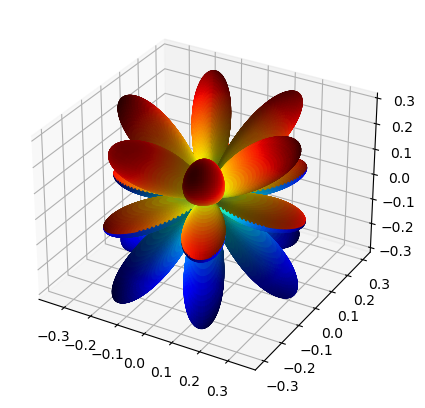

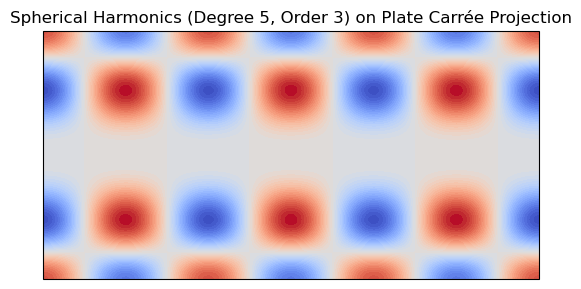

In [3]:
def sh_visualize_gt(L=30,M=29):
    lat, lon = np.linspace(-0.5*np.pi,0.5*np.pi,180), np.linspace(0,2*np.pi,360)
    PHI, THETA = np.meshgrid(lon,lat)
    R = sp.sph_harm(M, L, PHI, THETA).real
    X = R * np.sin(THETA) * np.cos(PHI)
    Y = R * np.sin(THETA) * np.sin(PHI)
    Z = R * np.cos(THETA)

    #As R has negative values, we'll use an instance of Normalize
    #see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
    norm = colors.Normalize()
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(7,5))
    m = cm.ScalarMappable(cmap=cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
    # ax.set_title('real$(Y^2_ 4)$', fontsize=20)
    m.set_array(R)
    # fig.colorbar(m, shrink=0.8)
    plt.show()
    
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([0,2*np.pi,-0.5*np.pi,0.5*np.pi], crs=ccrs.PlateCarree())
    # Create a contour plot of the spherical harmonics on the Plate Carrée map
    contour = ax.contourf(PHI, THETA, R, cmap='coolwarm', levels=50, transform=ccrs.PlateCarree())
    # plt.colorbar(contour, ax=ax, label='Spherical Harmonics Value')

    # Set title and show the map
    ax.set_title(f'Spherical Harmonics (Degree {L}, Order {M}) on Plate Carrée Projection')
    plt.show()
    
    return PHI, THETA, R
a = sh_visualize_gt(5,3)

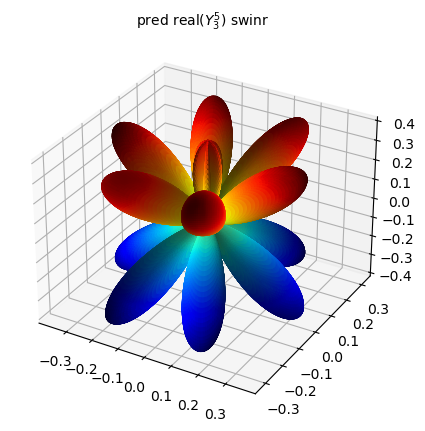

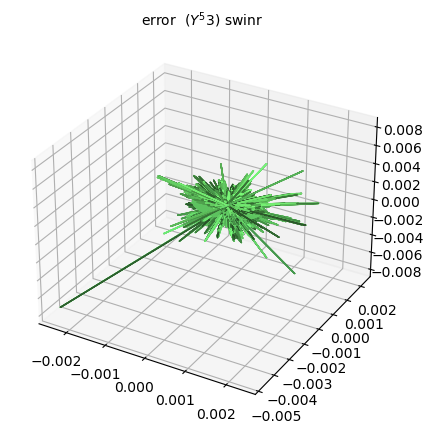

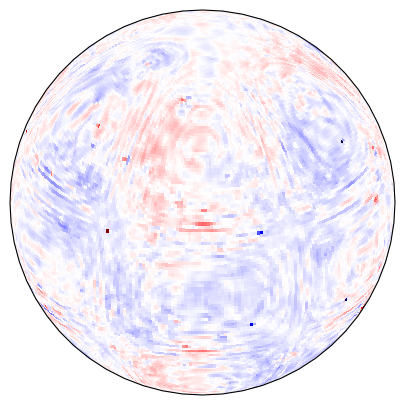

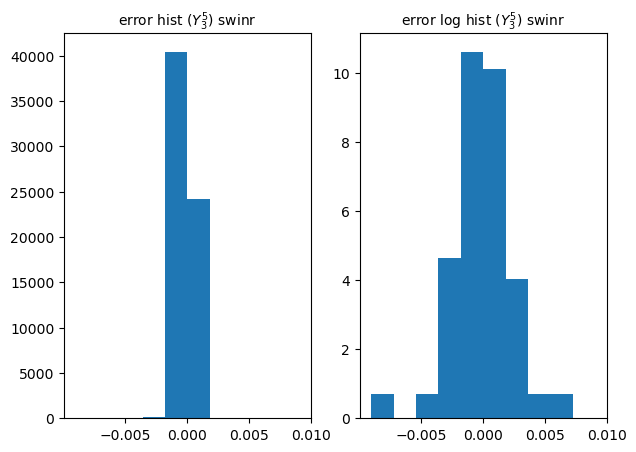

In [28]:
models = ["swinr","relu","wire","siren","shinr"]
for model in models[:1]:
    k = sh_visualize(f"../../harmonics_output/l5_m3/{model}/all/",title=model)

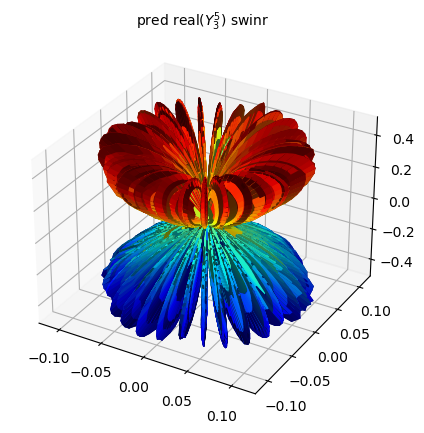

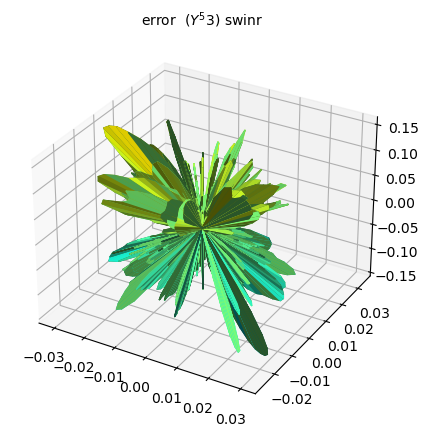

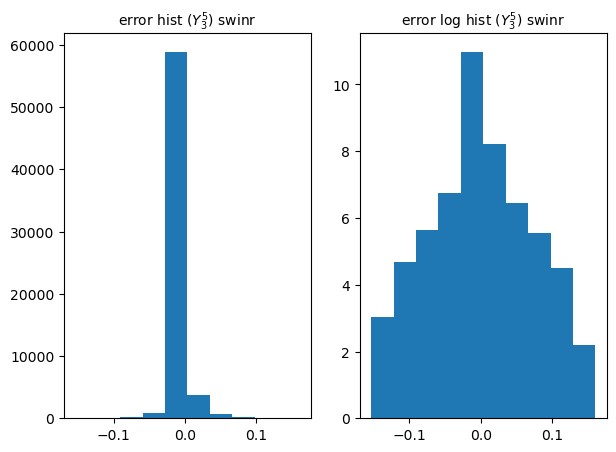

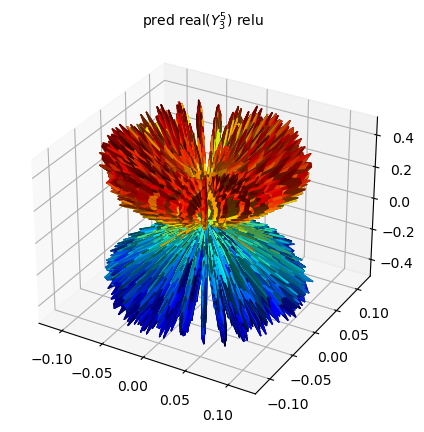

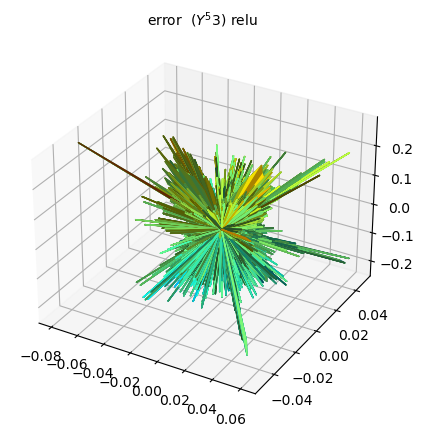

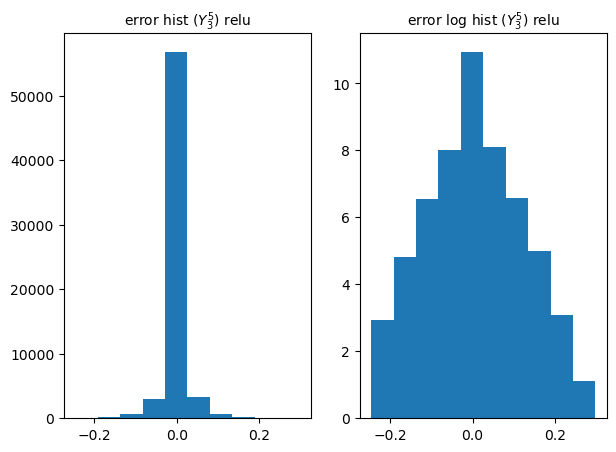

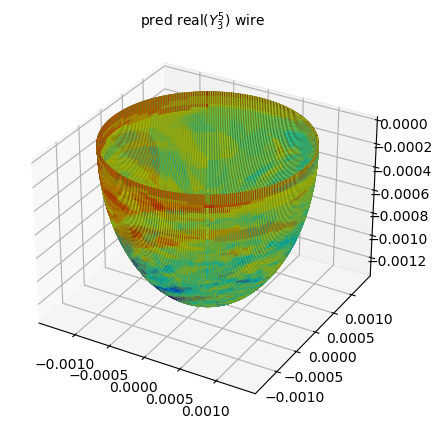

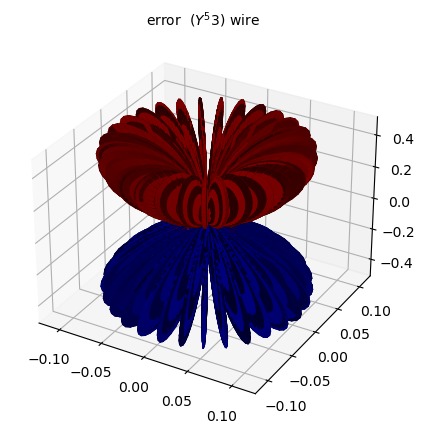

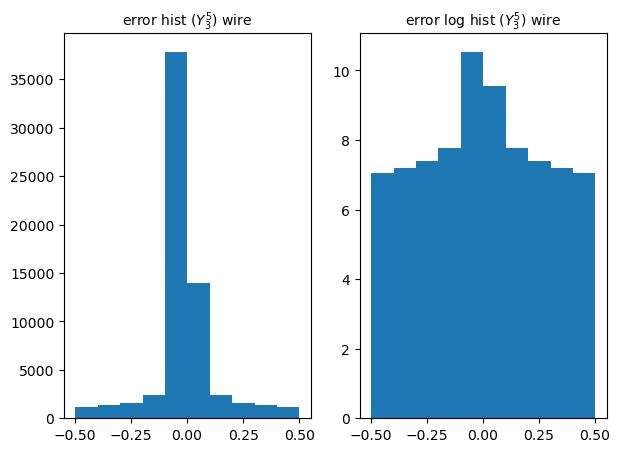

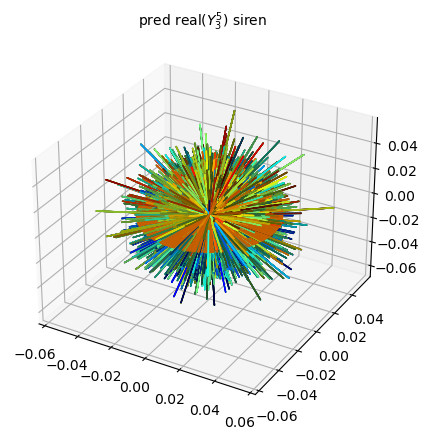

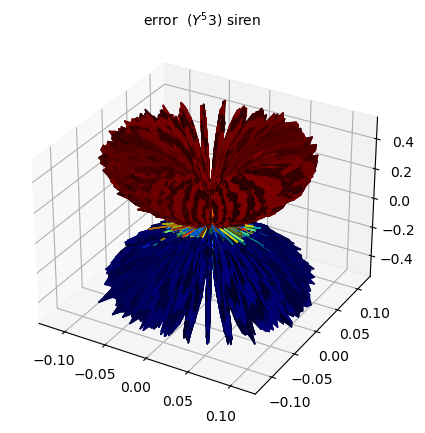

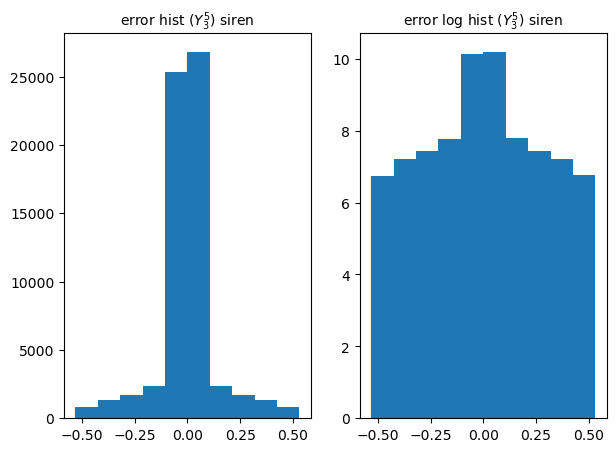

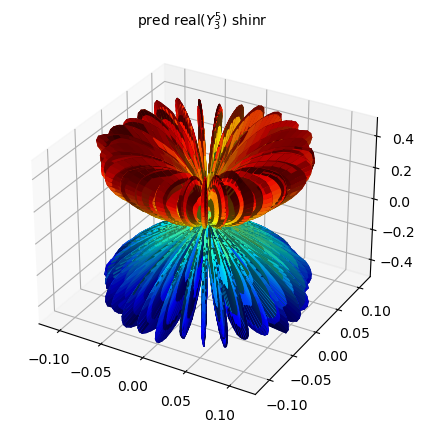

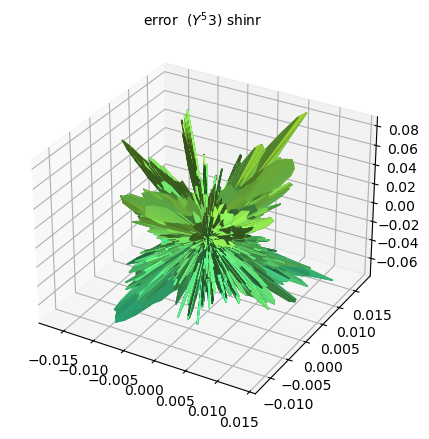

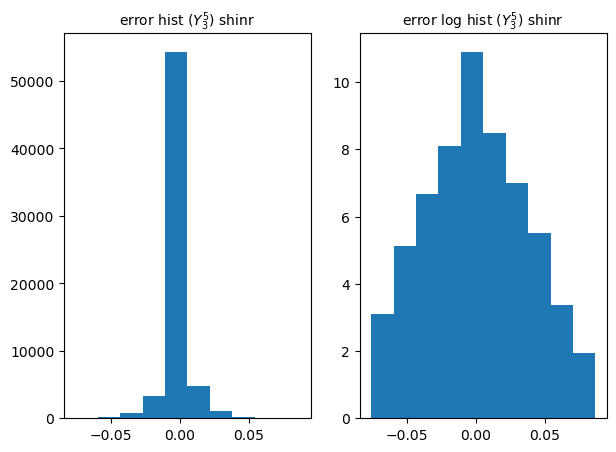

In [6]:
models = ["swinr","relu","wire","siren","shinr"]
for model in models:
    k = sh_visualize(f"../../harmonics_output/l30_m29/{model}/all/",title=model)